In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Read the data
df = pd.read_csv('PCA_ready.csv')
df.drop(columns=['Select Printer','Material 1','Printed On'], inplace=True)


# Handle missing values in numerical columns using median imputation
numerical_cols = df.columns
imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Scale all numerical features
scaler = StandardScaler()
all_features = numerical_cols
df[all_features] = scaler.fit_transform(df[all_features])

In [24]:
df.head()

,Printer Requested,Material 1 Qty,User Type,Print Time (Hours),Material_Category1
0,-0.305921,3.039558,-1.132097,1.796505,-2.384727
1,-0.305921,-0.194293,-1.132097,-0.350393,0.335301
2,-0.305921,0.176987,-1.132097,-0.171485,0.335301
3,-0.305921,1.747326,-1.132097,0.901964,0.335301
4,-0.305921,-0.357833,-1.132097,-0.529301,0.335301


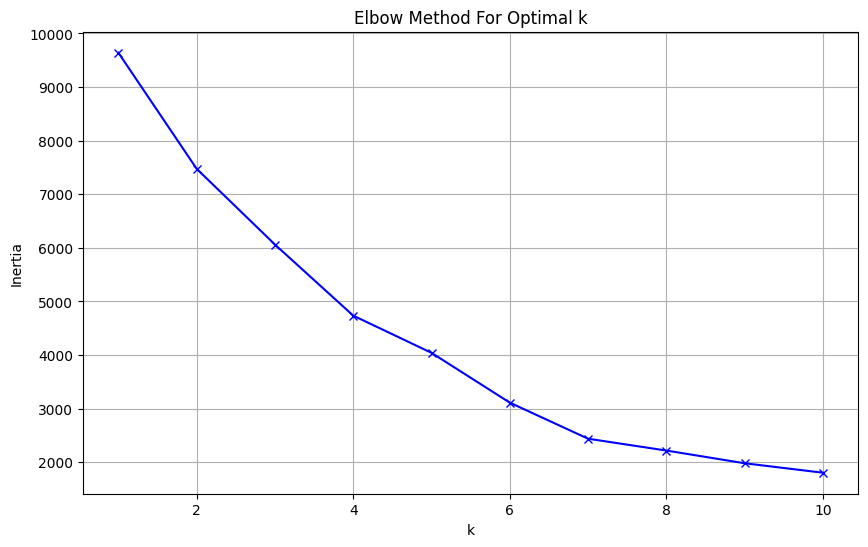

In [25]:
# Calculate inertia for different numbers of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertias = []
K = range(1, 11)  # Testing from 1 to 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [26]:
import pandas as pd

# Perform K-means clustering
from sklearn.cluster import KMeans
clusters = 5
kmeans = KMeans(n_clusters=clusters)
df['Cluster'] = kmeans.fit_predict(df[all_features])

# Print cluster sizes
print("\nCluster Sizes:")
print(df['Cluster'].value_counts().sort_index())

# Print characteristics of each cluster
print("\nCluster Characteristics:")
for cluster in range(clusters):
    print(f"\nCluster {cluster}:")
    cluster_data = df[df['Cluster'] == cluster]
    
    # Print statistics for all features
    print("\nFeature Statistics:")
    print(cluster_data[all_features].describe().round(2))





Cluster Sizes:
Cluster
0     172
1    1105
2      56
3     248
4     347
Name: count, dtype: int64

Cluster Characteristics:

Cluster 0:

Feature Statistics:
       Printer Requested  Material 1 Qty  User Type  Print Time (Hours)  \
count             172.00          172.00     172.00              172.00   
mean               -0.28            2.37       0.24                1.38   
std                 0.23            1.47       0.72                1.46   
min                -0.31           -0.68      -2.79               -0.53   
25%                -0.31            1.48       0.52                0.37   
50%                -0.31            1.96       0.52                0.90   
75%                -0.31            3.01       0.52                1.80   
max                 2.17            7.93       0.52               10.03   

       Material_Category1  
count              172.00  
mean                 0.15  
std                  0.72  
min                 -2.38  
25%                  0.34

[]

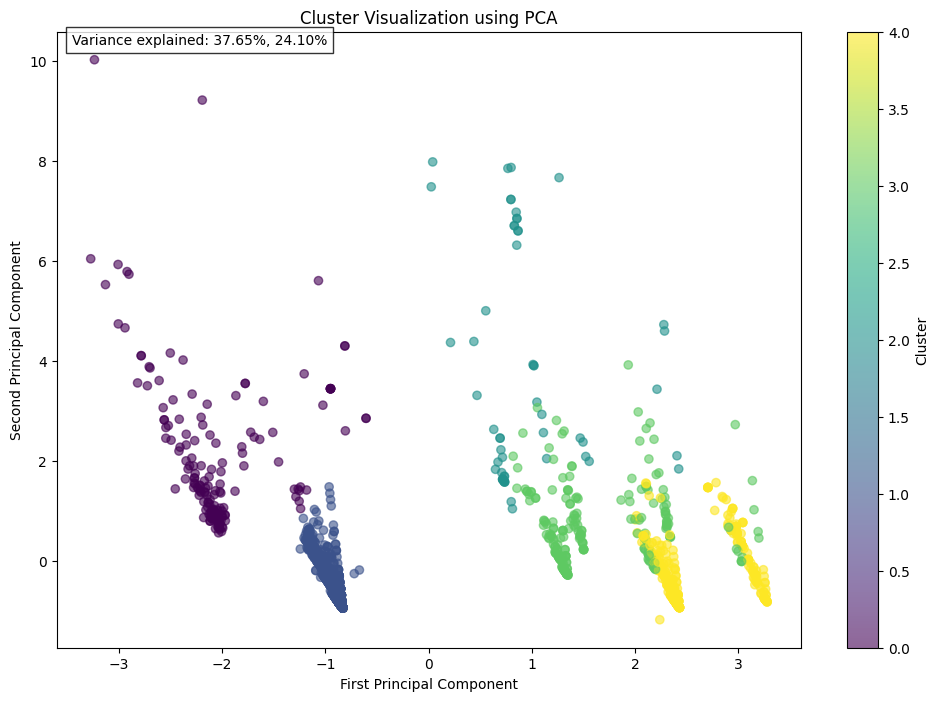

In [27]:
# Get the features used for clustering

from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)

# Create a scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], 
                     cmap='viridis', alpha=0.6)

# Add labels and title
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Cluster Visualization using PCA')

# Add a colorbar
plt.colorbar(scatter, label='Cluster')

# Add percentage of variance explained
var_explained = pca.explained_variance_ratio_
plt.text(0.02, 0.98, f'Variance explained: {var_explained[0]:.2%}, {var_explained[1]:.2%}',
         transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))

# Save the plot
plt.plot()



In [28]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from sklearn.decomposition import PCA





# # Apply PCA to reduce to 3 dimensions
# pca = PCA(n_components=3)
# X_pca = pca.fit_transform(df)



# # Create a 3D scatter plot
# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Create the scatter plot
# scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
#                     c=df['Cluster'], cmap='viridis', alpha=0.6)

# # Add labels and title
# ax.set_xlabel('First Principal Component')
# ax.set_ylabel('Second Principal Component')
# ax.set_zlabel('Third Principal Component')
# plt.title('3D Cluster Visualization using PCA')

# # Add a colorbar
# plt.colorbar(scatter, label='Cluster')

# # Add percentage of variance explained
# var_explained = pca.explained_variance_ratio_
# info_text = f'Variance explained:\nPC1: {var_explained[0]:.2%}\nPC2: {var_explained[1]:.2%}\nPC3: {var_explained[2]:.2%}'
# ax.text2D(0.02, 0.98, info_text, transform=ax.transAxes, 
#           bbox=dict(facecolor='white', alpha=0.8))

# # Adjust the viewing angle for better visualization
# ax.view_init(elev=20, azim=45)

# # Save the plot
# plt.plot()



In [29]:
# import seaborn as sns

# # Get only the features we used for clustering
# features = df.columns

# # Create loadings DataFrame with correct dimensions
# loadings = pd.DataFrame(
#     pca.components_.T,
#     columns=[f'PC{i+1}' for i in range(3)],  # Only 3 PCs since we used n_components=3
#     index=features
# )

# # Print the loadings
# print("\nFeature Loadings for each Principal Component:")
# print(loadings.round(3))

# # Print explained variance ratio
# print("\nExplained Variance Ratio:")
# for i, ratio in enumerate(pca.explained_variance_ratio_):
#     print(f"PC{i+1}: {ratio:.3%}")

# # Create a heatmap of the loadings
# plt.figure(figsize=(12, 8))
# sns.heatmap(loadings, annot=True, cmap='RdBu', center=0, fmt='.2f')
# plt.title('Feature Loadings for Principal Components')
# plt.tight_layout()
# plt.savefig('pca_loadings_heatmap.png', dpi=300, bbox_inches='tight')
# plt.close()

# # Print the top features for each PC
# print("\nTop features for each Principal Component:")
# for i in range(3):  # Show all 3 PCs
#     pc_loadings = loadings[f'PC{i+1}'].abs().sort_values(ascending=False)
#     print(f"\nPC{i+1} (explains {pca.explained_variance_ratio_[i]:.3%} of variance):")
#     for feature, loading in pc_loadings.items():
#         print(f"{feature}: {loading:.3f}")

In [30]:
# import seaborn as sns

# # Get only the features we used for clustering
# features = df.columns

# # Create loadings DataFrame with correct dimensions
# loadings = pd.DataFrame(
#     pca.components_.T,
#     columns=[f'PC{i+1}' for i in range(3)],  # Only 3 PCs since we used n_components=3
#     index=features
# )

# # Print the loadings
# print("\nFeature Loadings for each Principal Component:")
# print(loadings.round(3))

# # Print explained variance ratio
# print("\nExplained Variance Ratio:")
# for i, ratio in enumerate(pca.explained_variance_ratio_):
#     print(f"PC{i+1}: {ratio:.3%}")

# # Create a heatmap of the loadings
# plt.figure(figsize=(12, 8))
# sns.heatmap(loadings, annot=True, cmap='RdBu', center=0, fmt='.2f')
# plt.title('Feature Loadings for Principal Components')
# plt.tight_layout()
# plt.savefig('pca_loadings_heatmap.png', dpi=300, bbox_inches='tight')
# plt.close()

# # Print the top features for each PC
# print("\nTop features for each Principal Component:")
# for i in range(3):  # Show all 3 PCs
#     pc_loadings = loadings[f'PC{i+1}'].abs().sort_values(ascending=False)
#     print(f"\nPC{i+1} (explains {pca.explained_variance_ratio_[i]:.3%} of variance):")
#     for feature, loading in pc_loadings.items():
#         print(f"{feature}: {loading:.3f}")

In [31]:
df.columns

Index(['Printer Requested', 'Material 1 Qty', 'User Type',
       'Print Time (Hours)', 'Material_Category1', 'Cluster'],
      dtype='object')

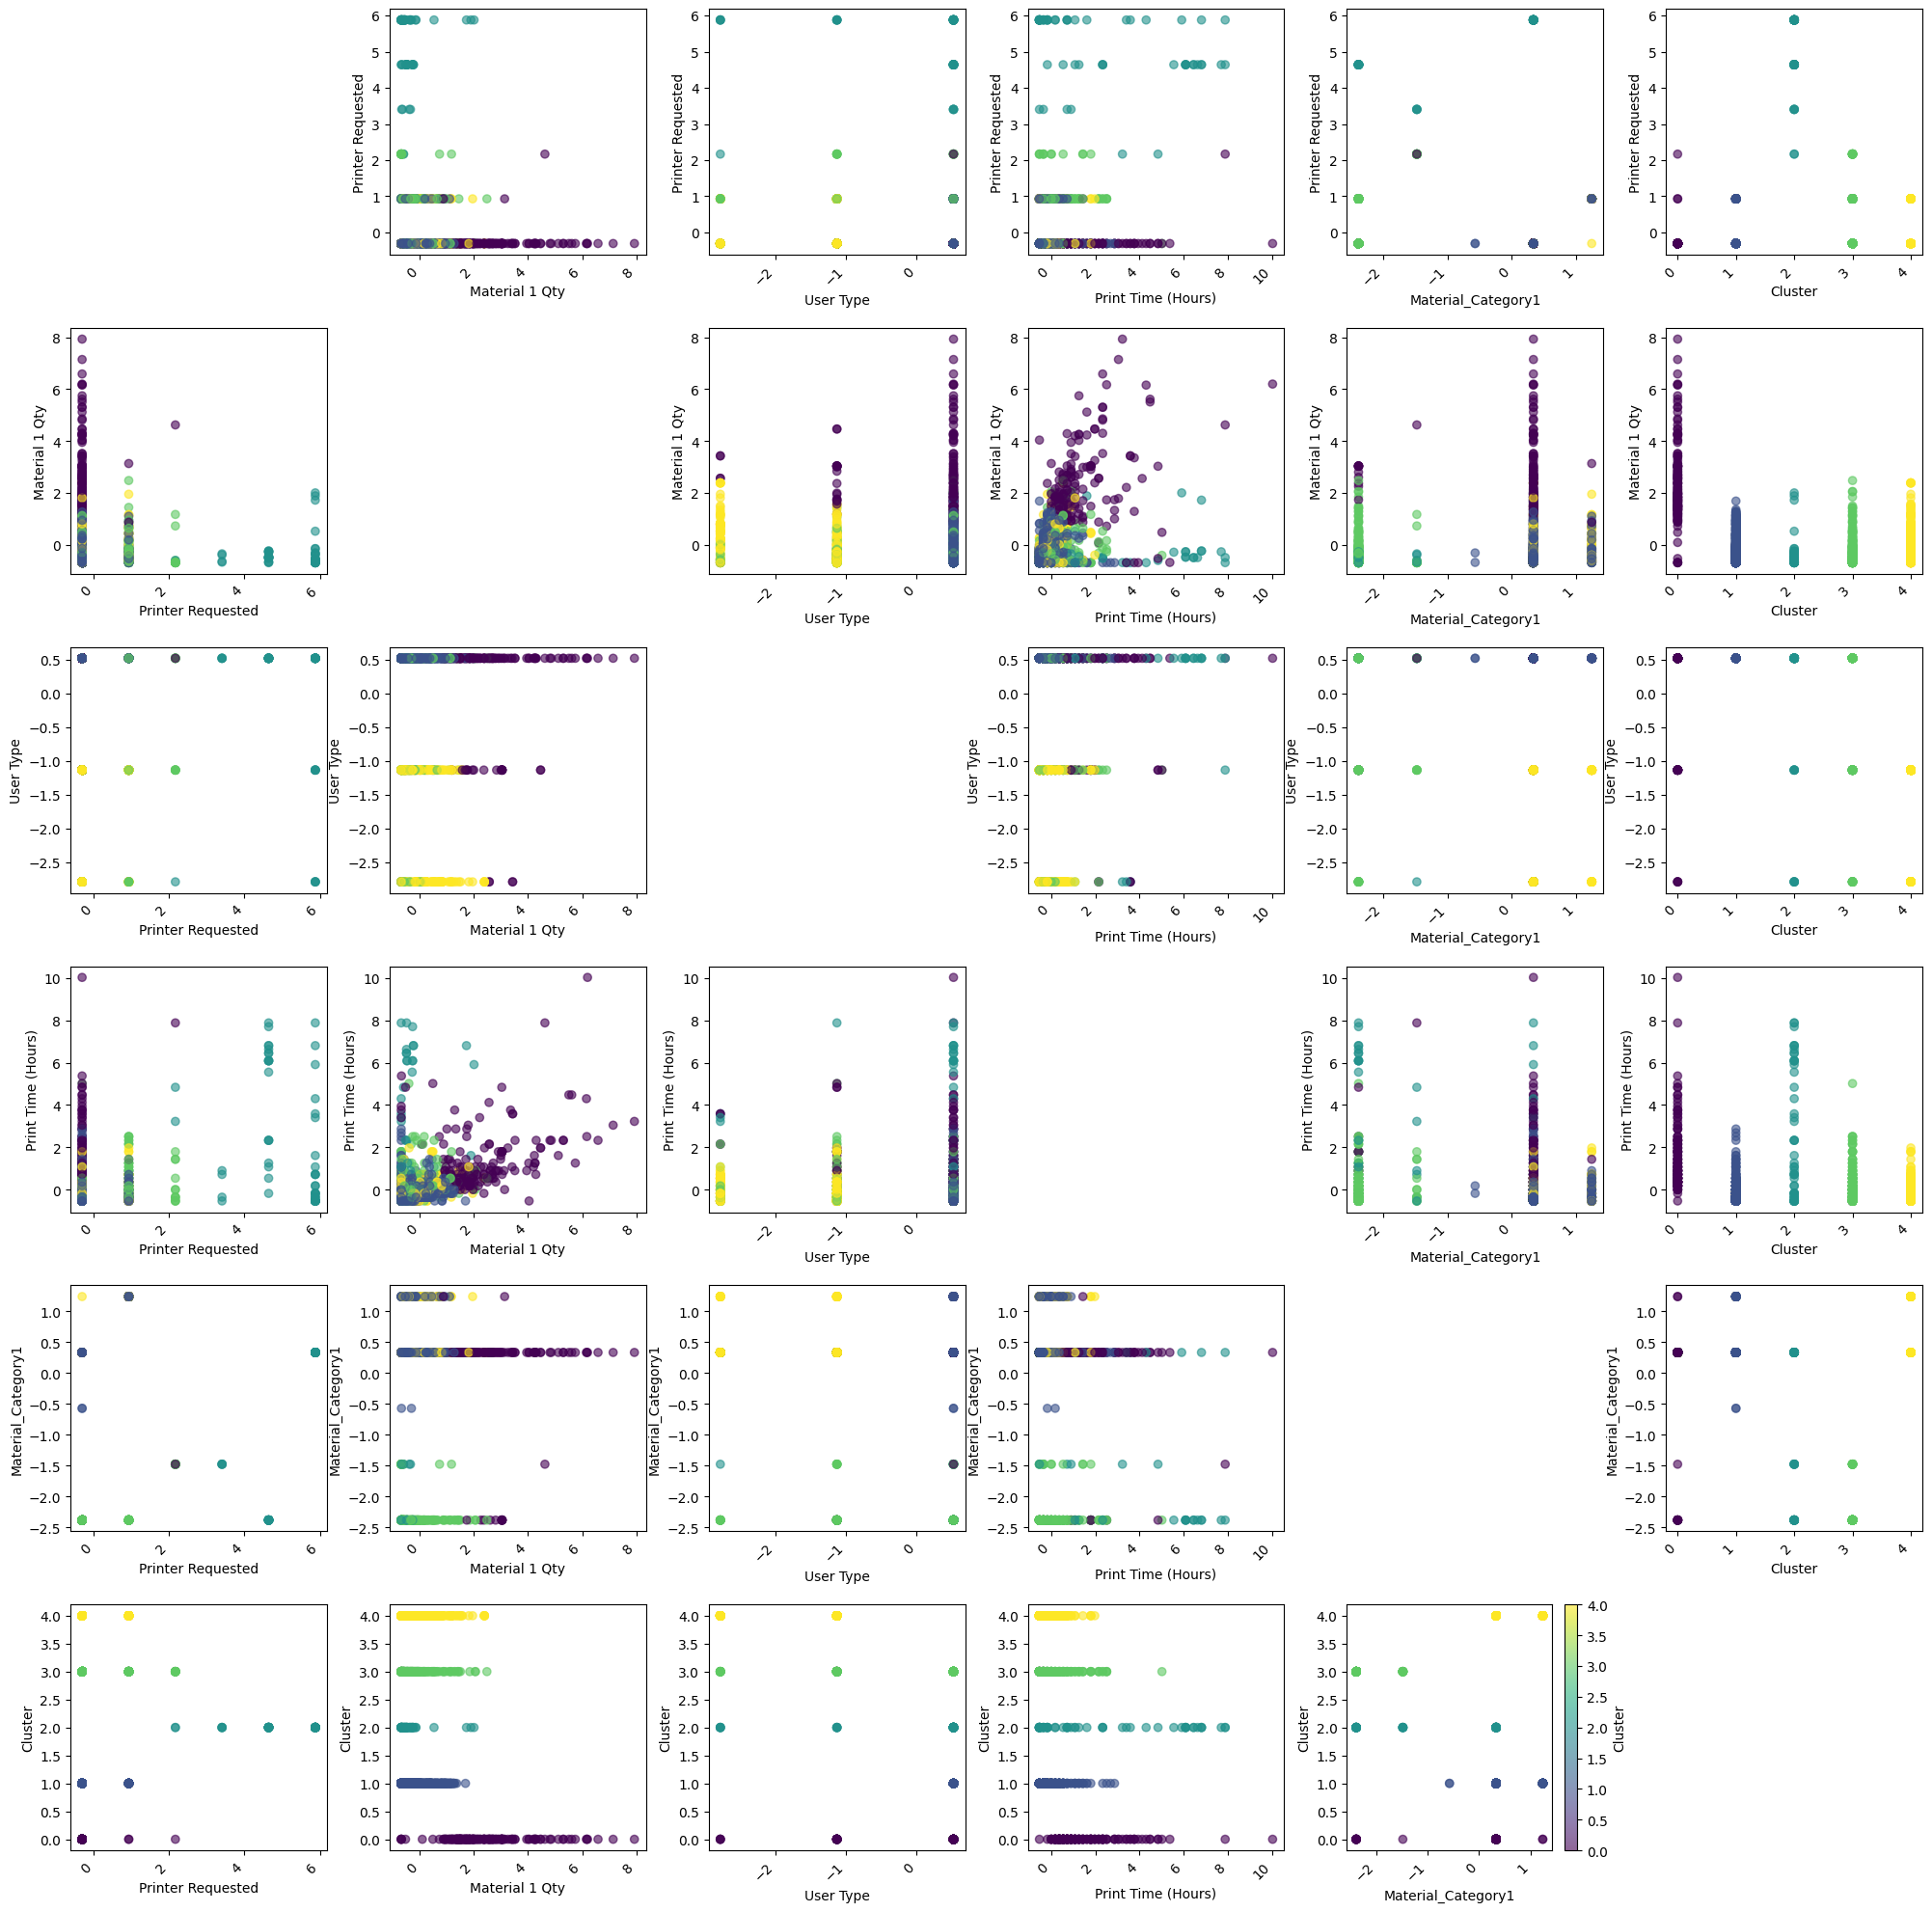

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data


# Select the columns we want to plot
columns_to_plot = ['Printer Requested', 'Material 1 Qty', 'User Type', 
                  'Print Time (Hours)', 'Material_Category1', 'Cluster']

# Create a grid of scatter plots
n_cols = len(columns_to_plot)
plt.figure(figsize=(20, 20))

for i, col1 in enumerate(columns_to_plot):
    for j, col2 in enumerate(columns_to_plot):
        if i != j:  # Don't plot columns against themselves
            plt.subplot(n_cols, n_cols, i * n_cols + j + 1)
            
            # Check if both columns are numeric
            if pd.api.types.is_numeric_dtype(df[col1]) and pd.api.types.is_numeric_dtype(df[col2]):
                scatter = plt.scatter(df[col2], df[col1], 
                                    c=df['Cluster'], cmap='viridis', alpha=0.6)
            else:
                # For categorical columns, use a different plot type
                if pd.api.types.is_numeric_dtype(df[col1]):
                    sns.boxplot(x=df[col2], y=df[col1])
                elif pd.api.types.is_numeric_dtype(df[col2]):
                    sns.boxplot(x=df[col1], y=df[col2])
                else:
                    # For two categorical columns, use a count plot
                    sns.countplot(x=df[col1], hue=df[col2])
            
            plt.xlabel(col2)
            plt.ylabel(col1)
            plt.xticks(rotation=45, ha='right')

# Add a colorbar for the scatter plots
plt.subplot(n_cols, n_cols, n_cols * n_cols)
plt.colorbar(scatter, label='Cluster')
plt.axis('off')

plt.tight_layout()
plt.savefig('column_pairs.png', dpi=300, bbox_inches='tight')
plt.show() 